## ハイパーパラメータチューニング

In [72]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.datasets import fetch_california_housing
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

## Grid Search

In [7]:
dataset = fetch_california_housing()

In [18]:
# 地区ごとの価格の中央値を予測するデータセット
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
y = dataset['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# モデル
lgbmr = lgb.LGBMRegressor(random_state=0)
param_grid = {'num_leaves': [10, 20, 30, 40, 50, 60],
             'max_depth': [5, 10, 15],
              'reg_alpha': [0, 0.01, 0.03]
             }

cv = KFold(n_splits=3, random_state=0, shuffle=True)
# 以下、scoreing引数に値を入れていないため、lgbmrのデフォルトが使われる
# 今回の場合は、R^2
gs = GridSearchCV(estimator=lgbmr, param_grid=param_grid, cv=cv)
## early_stopping
callbacks = [lgb.early_stopping(stopping_rounds=10)]
eval_set = [(X_test, y_test)] # 本来X_valなどが適切だが今回は割愛
fit_params = {'callbacks': callbacks, 'eval_set': eval_set}
gs.fit(X_train, y_train, **fit_params) #fit_paramsをアンパックしてfitに入れる

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.264841
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.256456
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.256456
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.256456
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.256456
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.256456
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.256456
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.255538
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.255538
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.240402
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.240164
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.240164
Did not meet ea

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=LGBMRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 15],
                         'num_leaves': [10, 20, 30, 40, 50, 60],
                         'reg_alpha': [0, 0.01, 0.03]})

In [25]:
cv_results_df = pd.DataFrame(gs.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_num_leaves,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.165626,0.073467,0.019064,0.001486,5,10,0,"{'max_depth': 5, 'num_leaves': 10, 'reg_alpha'...",0.797096,0.807785,0.805461,0.803448,0.004590,54
1,0.122190,0.009818,0.019843,0.003315,5,10,0.01,"{'max_depth': 5, 'num_leaves': 10, 'reg_alpha'...",0.798894,0.806981,0.806050,0.803975,0.003613,53
2,0.118329,0.030955,0.024818,0.004051,5,10,0.03,"{'max_depth': 5, 'num_leaves': 10, 'reg_alpha'...",0.799277,0.806364,0.806658,0.804100,0.003413,52
3,0.172831,0.047333,0.028754,0.011224,5,20,0,"{'max_depth': 5, 'num_leaves': 20, 'reg_alpha'...",0.811435,0.821243,0.815893,0.816190,0.004010,36
4,0.155900,0.018946,0.021166,0.000581,5,20,0.01,"{'max_depth': 5, 'num_leaves': 20, 'reg_alpha'...",0.810028,0.821356,0.813901,0.815095,0.004701,45


In [26]:
cv_results_df[cv_results_df['rank_test_score'] <= 5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_num_leaves,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
31,0.401420,0.136768,0.043135,0.005392,10,50,0.01,"{'max_depth': 10, 'num_leaves': 50, 'reg_alpha...",0.830405,0.836686,0.831827,0.832973,0.002689,4
48,0.216157,0.002920,0.031596,0.000608,15,50,0,"{'max_depth': 15, 'num_leaves': 50, 'reg_alpha...",0.832775,0.835162,0.831380,0.833106,0.001561,3
50,0.257331,0.016373,0.032617,0.000790,15,50,0.03,"{'max_depth': 15, 'num_leaves': 50, 'reg_alpha...",0.831301,0.836506,0.831811,0.833206,0.002343,2
51,0.258834,0.009279,0.044918,0.014177,15,60,0,"{'max_depth': 15, 'num_leaves': 60, 'reg_alpha...",0.831043,0.838500,0.828755,0.832766,0.004161,5
52,0.316133,0.047491,0.036990,0.003012,15,60,0.01,"{'max_depth': 15, 'num_leaves': 60, 'reg_alpha...",0.832910,0.839080,0.829426,0.833805,0.003992,1


In [31]:
for index, row in cv_results_df[cv_results_df['rank_test_score'] <= 5].iterrows():
    print(f'{row["rank_test_score"]}:{row["params"]}')
    print(f'{row["mean_test_score"]}')

4:{'max_depth': 10, 'num_leaves': 50, 'reg_alpha': 0.01}
0.8329725903236045
3:{'max_depth': 15, 'num_leaves': 50, 'reg_alpha': 0}
0.8331058990226472
2:{'max_depth': 15, 'num_leaves': 50, 'reg_alpha': 0.03}
0.8332059773155042
5:{'max_depth': 15, 'num_leaves': 60, 'reg_alpha': 0}
0.8327661059213919
1:{'max_depth': 15, 'num_leaves': 60, 'reg_alpha': 0.01}
0.8338051795879502


In [38]:
# 一番精度が良かったパラメータで推論

lgbmr = lgb.LGBMRegressor(**gs.best_params_, random_state=0, learning_rate=0.01, n_estimators=3000)
callbacks = [lgb.early_stopping(stopping_rounds=10)]
eval_set = [(X_test, y_test)] # 本来X_valなどが適切だが今回は過学習気味
fit_params = {'callbacks': callbacks, 'eval_set': eval_set}

lgbmr.fit(X_train, y_train, **fit_params)



Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1578]	valid_0's l2: 0.189091


LGBMRegressor(learning_rate=0.01, max_depth=15, n_estimators=3000,
              num_leaves=60, random_state=0, reg_alpha=0.01)

In [39]:
lgbmr.score(X_test, y_test)
#eval_setと同じデータを使っているので過学習気味になる
#実際は未知のデータに対してスコアを評価しよう

0.8549868703957861

## Grid SearchをPipelineに組み込んで処理
- pipelineと組み合わせることで、前処理を含めてGridSearchが可能になりコードも綺麗になる

1. Pipelineオブジェクト作成
- 前処理やモデルオブジェクトをsteps引数へ
- 特定のカラムに処理をする場合はColumnTransformerを併用
2. cvオブジェクトを作成
3. GridSearchCVオブジェクトを作成
- estimator引数にはPipelineオブジェクトを渡す
- param_grid引数には、pipelineで指定した名前を接頭語に使用する
- ex:{"pca__n_components:[5,10]", "logistic__C":[1,5,10]}
4. .best_params_や.best_score_.や.cv_results_で結果確認

In [40]:
# Pipeline + Grid Search

In [42]:
df = pd.read_csv('../section8/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [52]:
# データクリーニング
df.loc[df['sex'] == '.', 'sex'] = np.nan
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [53]:
# 欠損値除去
df.dropna(thresh=3, inplace=True)

In [60]:
# 特徴量
X = df.drop('species', axis = 1)
y = df['species']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             342 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 26.8+ KB


In [77]:
# Pipeline + GridSearch
# modelはLGBMを使いたいので
# - カテゴリカル変数のエンコーディングと、sexカラムの欠損値代入


# 欠損値代入
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
imputer = SimpleImputer(strategy='most_frequent')
ct = ColumnTransformer([('cat_imputer', imputer, cat_cols)], remainder = 'passthrough')
ct.set_output(transform='pandas')
ct.fit_transform(X)

# one-hot-encoding
# pipelineに入れる必要あり
#（パイプラインの中でsexカラムが欠損になっているデータは、pipelineの中で最頻値が入れられるがtestデータの状況によって入る値が変わる）
# ※ sklearnにはデフォルトで、OHEしてくれるtransformerがないため要自作
class GetDummies(BaseEstimator, TransformerMixin): #2つのクラスを継承
    
    def __init__(self):
        self.columns = None
        
    def fit(self, X, y = None):
        self.columns = pd.get_dummies(X).columns
        return self
    
    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns = self.columns, fill_value = 0)
# model
lgbmc = lgb.LGBMClassifier(random_state = 0)

# pipelineに組み込む
pipeline = Pipeline([('impute', ct), ('dummy', GetDummies()), ('model', lgbmc)])

# cv
cv = KFold(n_splits=3, random_state = 0, shuffle=True)

# grid search
# LGBMのパラメータのみ（接頭語忘れず！）
param_grid = {'model__num_leaves': [10, 20, 30, 40, 50, 60],
             'model__max_depth': [5, 10, 15],
              'model__reg_alpha': [0, 0.01, 0.03]
             }
gs = GridSearchCV(pipeline, param_grid=param_grid, cv=cv)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('impute',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['island',
                                                                          'sex'])])),
                                       ('dummy', GetDummies()),
                                       ('model',
                                        LGBMClassifier(random_state=0))]),
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__num_leaves': [10, 20, 30, 40, 50, 60],
                         'model__reg_alpha': [0, 0.01, 0.03]})

In [82]:
cv_results_df = pd.DataFrame(gs.cv_results_)
cv_results_df.head() 
#rank_test_score が　1,19しかない
#簡単な問題設定だからかな

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__num_leaves,param_model__reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082045,0.029182,0.010008,0.002410,5,10,0,"{'model__max_depth': 5, 'model__num_leaves': 1...",0.991228,0.982456,0.991228,0.988304,0.004135,1
1,0.042548,0.007710,0.010136,0.001689,5,10,0.01,"{'model__max_depth': 5, 'model__num_leaves': 1...",0.991228,0.991228,0.973684,0.985380,0.008270,19
2,0.049809,0.009612,0.012358,0.003482,5,10,0.03,"{'model__max_depth': 5, 'model__num_leaves': 1...",0.991228,0.991228,0.973684,0.985380,0.008270,19
3,0.039998,0.001392,0.007918,0.000327,5,20,0,"{'model__max_depth': 5, 'model__num_leaves': 2...",0.991228,0.982456,0.991228,0.988304,0.004135,1
4,0.031222,0.000529,0.007478,0.000306,5,20,0.01,"{'model__max_depth': 5, 'model__num_leaves': 2...",0.991228,0.991228,0.973684,0.985380,0.008270,19


In [74]:
pipeline

Pipeline(steps=[('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['island', 'sex'])])),
                ('dummy', GetDummies()),
                ('model', LGBMClassifier(random_state=0))])

## Random Search CV
- 基本の使い方は、Grid Searchと同一
- sklearn.model)selection.RandomizedSearchCVクラス
1. インスタンス生成
  - estimator:sklearnのモデルインスタンス
  - __param_distributions:探索するパラメータと値を出力するobject（または値のリスト）のdict__ ※（Grid Searchでいうparam_grid）
    - 例：{"<name>" : object, ...}
    - objectは.rsv()メソッド(統計関連 random variables 確率変量)を実装している必要がある
      - scipy.stats.uniformやscipy.stats.randintを使用することが多い
  - scorong:評価指標
  - cv: sklearnのcvオブジェクト
  - n_iter: イテレーションの回数
2. .fit(X,y)で学習
3. .best_paramsや.best_score_で結果を確認
    

In [83]:
from sklearn.model_selection import  RandomizedSearchCV
dataset = fetch_california_housing()

In [85]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [86]:
y = dataset['target']

In [98]:
# valデータを、early-stoppingに使う
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# modelの準備
lgbmr = lgb.LGBMRegressor(random_state = 0)

In [99]:
# param_grid = {'num_leaves': [10, 20, 30, 40, 50, 60],
#              'max_depth': [5, 10, 15],
#               'reg_alpha': [0, 0.01, 0.03]
#              }

# Grid時のリストとは異なり、
# - 数値カラムがある範囲内からランダムで取得して欲しい場合 = 値を生成するオブジェクト
# - 数値カラムがあるリストからランダムで取得して欲しい場合 = 値のリスト
from scipy.stats import  uniform # uniform:一様分布
from scipy.stats import randint as sp_randint # random.randintと混同されがち
print(uniform(0, 1).rvs())  # ある指定の範囲の値（float）
print(randint(10,50).rvs()) # ある指定の範囲の値(int)

param_dist = {'num_leaves': randint(10,60),
             'max_depth': randint(5,15),
              'reg_alpha': uniform(0, 0.03)
             }

eval_set = [(X_val, y_val)]
callbacks = [lgb.early_stopping(stopping_rounds=10)]
fit_params = {'callbacks':callbacks, 'eval_set':eval_set}

# cv
cv = KFold(n_splits=3, shuffle=True, random_state=0)

# random search
rs = RandomizedSearchCV(lgbmr, param_distributions=param_dist, cv = cv, n_iter = 36)
rs.fit(X_train, y_train, **fit_params)

# 全体の流れ
# データ分割: 最初にデータセットを訓練用 (X_train, y_train) と検証用 (X_val, y_val) に分割します。検証用データは主にearly_stoppingに使われます。

# ハイパーパラメータチューニング: X_trainの中でさらにクロスバリデーションを行い、複数のハイパーパラメータの組み合わせを試し、最適なものを選択します。X_trainの一部を使って内部で訓練・検証を行い、その性能を基に最適なハイパーパラメータを選びます。

# Early Stopping: チューニングが終わった後、選ばれた最適なモデルがX_valに対して適用され、early_stoppingによって過学習を防ぎます。

0.6324691415156175
17
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.2171
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.210755
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.210755
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.210755
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.210755
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.210755
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.210755
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.209882
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.209882
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.209882
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.209882
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.20

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=LGBMRegressor(random_state=0), n_iter=36,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa6ab1b6100>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa6ab1bb670>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fa6aa63dd30>})

In [104]:
cv_results_df = pd.DataFrame(rs.cv_results_)
cv_results_df.head() 
# test_scoreと言っているのは、Hold-outしたvalデータではなく（これはearly_stopping用）
# cvで3foldした時のテストスコアの値

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_num_leaves,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.464007,0.107901,0.045781,0.005858,11,47,0.020267,"{'max_depth': 11, 'num_leaves': 47, 'reg_alpha...",0.828707,0.834849,0.828364,0.830640,0.002980,10
1,0.270699,0.029037,0.030486,0.000401,13,37,0.014916,"{'max_depth': 13, 'num_leaves': 37, 'reg_alpha...",0.828731,0.836581,0.826478,0.830597,0.004330,11
2,0.446035,0.283485,0.056988,0.034618,13,52,0.007556,"{'max_depth': 13, 'num_leaves': 52, 'reg_alpha...",0.830842,0.836797,0.830330,0.832656,0.002935,6
3,0.507289,0.063094,0.053970,0.006844,10,35,0.021186,"{'max_depth': 10, 'num_leaves': 35, 'reg_alpha...",0.828016,0.833674,0.826772,0.829487,0.003004,13
4,0.557932,0.137839,0.143750,0.106688,7,39,0.011257,"{'max_depth': 7, 'num_leaves': 39, 'reg_alpha'...",0.822242,0.831550,0.826039,0.826610,0.003822,24


In [106]:
for _, row in cv_results_df[cv_results_df['rank_test_score'] <= 5].iterrows():
    print(f"{row['rank_test_score']}:{row['params']}")
    print(f"{row['mean_test_score']}")

1:{'max_depth': 14, 'num_leaves': 57, 'reg_alpha': 0.024205716311964665}
0.8342588949935946
4:{'max_depth': 12, 'num_leaves': 55, 'reg_alpha': 0.01890478174315816}
0.8328339477162773
3:{'max_depth': 11, 'num_leaves': 59, 'reg_alpha': 0.0006803056121576556}
0.8332952201476157
5:{'max_depth': 13, 'num_leaves': 50, 'reg_alpha': 0.0010811177768120406}
0.8326946661135034
2:{'max_depth': 13, 'num_leaves': 56, 'reg_alpha': 0.007891411494528206}
0.8333267297525141


In [109]:
# Grid Search時の1番スコアが良かったモデル
# 1:{'max_depth': 15, 'num_leaves': 60, 'reg_alpha': 0.01}
# 0.8338051795879502


rs.best_params_
# あらかじめ指定して組み合わせだけ試すGrid Searchより高精度になりがち

{'max_depth': 14, 'num_leaves': 57, 'reg_alpha': 0.024205716311964665}

## ベイズ最適化
- hyperoptライブラリ
  - pip install hyperoptでインストール
  - hyperopt.fmin.fmin() - ベイズ最適化
    - objective: 最小化したい目的関数（Pythonの関数を渡す）
      - モデルインスタンス生成
      - 学習および評価
      - 精度を返す(__最小化することを目的としているので、Accuracy等スコアを返す際はマイナスで__)  
    - space:変数の範囲をdictionary形式で渡す
      - hyperopt.hp.quniform()やhyperopt.hp.uniform()を使用
    - algo: hyperopt.tpe.sugest
    - max_evals: イテレーション回数

#### ベイズ最適化の基本的な考え方
- ブラックボックス関数の最適化:
  - 最適化したい関数 f(x) の形状や計算式は分からないが、入力 x に対して結果 f(x) を観測できる。
  - この関数 f(x) を評価しながら、次にどのパラメータを試すべきかを効率的に選んでいく。
  - これにより、探索を効率化し、最小化（または最大化）したい値を見つける。
- 目的関数 (objective):
  - 目的関数は、ベイズ最適化によって最小化される関数です。この関数は、ハイパーパラメータを入力として受け取り、そのパラメータに基づいてモデルを学習し、その評価結果を返します。


In [110]:
from hyperopt import hp, tpe
from hyperopt.fmin import  fmin

In [123]:
from sklearn.model_selection import cross_val_score
# データ
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
X.head()
y = dataset['target']

# 関数
def objective(params):
    # モデルの生成・学習・評価値を返す
    params = {'num_leaves': int(params['num_leaves']), #この段階ではfloat
             'max_depth': int(params['max_depth']), #この段階ではfloat
             'reg_alpha': params['reg_alpha']
             }
    
    model = lgb.LGBMRegressor(**params, random_state=0)
    cv = KFold(n_splits=3, random_state=0, shuffle=True)
    
    # LGBMのデフォルトのスコア関数はR-squared（高ければ良いスコア）
    scores = cross_val_score(model, X, y, cv = cv)
    
    log['params'].append(params)
    log['score'].append(scores.mean())
    log['score_std'].append(scores.std())
    
    return -scores.mean()


space = {'num_leaves': hp.quniform('num_leaves',10,60,2), #この段階ではfloat
         'max_depth': hp.quniform('max_depth',5,15,2), #この段階ではfloat
          'reg_alpha': hp.uniform('reg_alpha',0, 0.03)
         }

log = {'params': [], 'score': [], 'score_std': []}

best = fmin(objective, space=space, algo=tpe.suggest, max_evals=100)

100%|██████████| 100/100 [01:32<00:00,  1.08trial/s, best loss: -0.8418162465179678]


In [124]:
# round(uniform(low,high) / q) * q -> scipy.stats.randintと同じ処理らしい
# ↑
# hp.quniform('params_name',low, high, q)
# hp.quniform('test',0, 10, 2)
# round(uniform(0,10).rvs()/2) # 実行のたび値変わる


In [125]:
best

{'max_depth': 14.0, 'num_leaves': 60.0, 'reg_alpha': 0.012126886029577462}

In [134]:
log_df = pd.DataFrame(log)
log_df = log_df.sort_values('score', ascending = False)

In [135]:
log_df[['num_leaves', 'max_depth', 'req_alpha']] = log_df.apply(lambda row: pd.Series(row['params']),axis=1 )
log_df.head(3)


,params,score,score_std,num_leaves,max_depth,req_alpha
55,"{'num_leaves': 60, 'max_depth': 14, 'reg_alpha...",0.841816,0.002343,60.0,14.0,0.012127
92,"{'num_leaves': 56, 'max_depth': 14, 'reg_alpha...",0.841453,0.003190,56.0,14.0,0.006850
24,"{'num_leaves': 60, 'max_depth': 12, 'reg_alpha...",0.841109,0.003245,60.0,12.0,0.024385


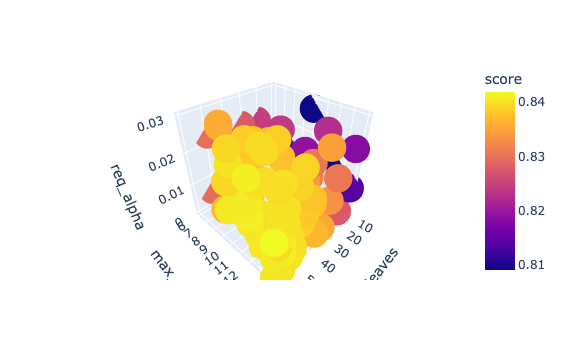

In [140]:
import plotly.express as px
fig = px.scatter_3d(log_df, x = 'num_leaves', y = 'max_depth', z = 'req_alpha', color = 'score')
fig.show()

# scoreが高い部分付近でたくさんパラメータが試行されている
# この辺りが最適解か？とあくまで予想

#### まとめ
- ランダムサーチ:
  - 指定された範囲から完全にランダムにパラメータを選び、試行を繰り返す。
  - 過去の試行結果には基づかず、すべてのパラメータセットが等しい確率で選ばれます。

- ベイズ最適化:
  - 初回の試行でランダムに選ばれたパラメータセットが初期値として使用、それ以降は過去の試行結果を基に、次に試すべきパラメータを確率的に選択します。
  - ベイズの定理を活用し、次に最も有望なパラメータを選ぶことを目的としています。
  - tpe.suggestは、過去の実績を考慮してパラメータ選択を行うアルゴリズムです。具体的には、良い結果をもたらす可能性が高いパラメータの分布を学習し、その分布に基づいて次の試行を行います。
  
  - spaceで設定されているのは、初期値ではなく値の分布
    - ここで指定された範囲は、ベイズ最適化の探索空間を定義します。
    - fminが最初の試行を行う際には、この探索空間内からランダムに初期値が選ばれ、その後の試行では過去の結果に基づいてパラメータが選ばれます。
 